---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `Employee_Movie_Choices.txt`.

A second file, `Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite


# This is the list of employees
employees = ['Andy',
             'Claude',
             'Frida',
             'Georgia',
             'Joan',
             'Lee',
             'Pablo',
             'Vincent']

# This is the list of movies
movies =    ['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls']

In [2]:
# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

### Question 1

Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

In [3]:
def answer_one():
    
    # Import data to a Pandas dataframe
    B_df = pd.read_csv('../materials/Employee_Movie_Choices.txt', delimiter = '\t')
    
    # Create graph from pandas
    B = nx.from_pandas_dataframe(B_df, '#Employee', 'Movie')
    
    # Return graph
    return B

In [4]:
answer_one().nodes(data = True)

[('Andy', {}),
 ('Anaconda', {}),
 ('Mean Girls', {}),
 ('The Matrix', {}),
 ('Claude', {}),
 ('Monty Python and the Holy Grail', {}),
 ('Snakes on a Plane', {}),
 ('Frida', {}),
 ('The Shawshank Redemption', {}),
 ('The Social Network', {}),
 ('Georgia', {}),
 ('Joan', {}),
 ('Forrest Gump', {}),
 ('Kung Fu Panda', {}),
 ('Lee', {}),
 ('Pablo', {}),
 ('The Dark Knight', {}),
 ('Vincent', {}),
 ('The Godfather', {})]

### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

In [5]:
def answer_two():
    
    # Get input graph
    B = answer_one()
    
    # Iterate over each node and add the 'type' atribute
    for node in B.nodes():
        if node in movies:
            B.node[node]['type'] = 'movie'
        else:
            B.node[node]['type'] = 'employee'
    
    # Return the updated graph
    return B

In [6]:
answer_two().nodes(data = True)

[('Andy', {'type': 'employee'}),
 ('Anaconda', {'type': 'movie'}),
 ('Mean Girls', {'type': 'movie'}),
 ('The Matrix', {'type': 'movie'}),
 ('Claude', {'type': 'employee'}),
 ('Monty Python and the Holy Grail', {'type': 'movie'}),
 ('Snakes on a Plane', {'type': 'movie'}),
 ('Frida', {'type': 'employee'}),
 ('The Shawshank Redemption', {'type': 'movie'}),
 ('The Social Network', {'type': 'movie'}),
 ('Georgia', {'type': 'employee'}),
 ('Joan', {'type': 'employee'}),
 ('Forrest Gump', {'type': 'movie'}),
 ('Kung Fu Panda', {'type': 'movie'}),
 ('Lee', {'type': 'employee'}),
 ('Pablo', {'type': 'employee'}),
 ('The Dark Knight', {'type': 'movie'}),
 ('Vincent', {'type': 'employee'}),
 ('The Godfather', {'type': 'movie'})]

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

In [7]:
def answer_three():
        
    # Get input graph
    B = answer_two()
    
    # Return weighted graph projection
    return bipartite.weighted_projected_graph(B, employees)

In [8]:
answer_three().edges(data = True)

[('Andy', 'Frida', {'weight': 1}),
 ('Andy', 'Georgia', {'weight': 1}),
 ('Andy', 'Joan', {'weight': 1}),
 ('Andy', 'Lee', {'weight': 1}),
 ('Andy', 'Claude', {'weight': 1}),
 ('Andy', 'Pablo', {'weight': 1}),
 ('Claude', 'Georgia', {'weight': 3}),
 ('Frida', 'Pablo', {'weight': 2}),
 ('Frida', 'Vincent', {'weight': 2}),
 ('Joan', 'Lee', {'weight': 3}),
 ('Pablo', 'Vincent', {'weight': 1})]

<IPython.core.display.Javascript object>


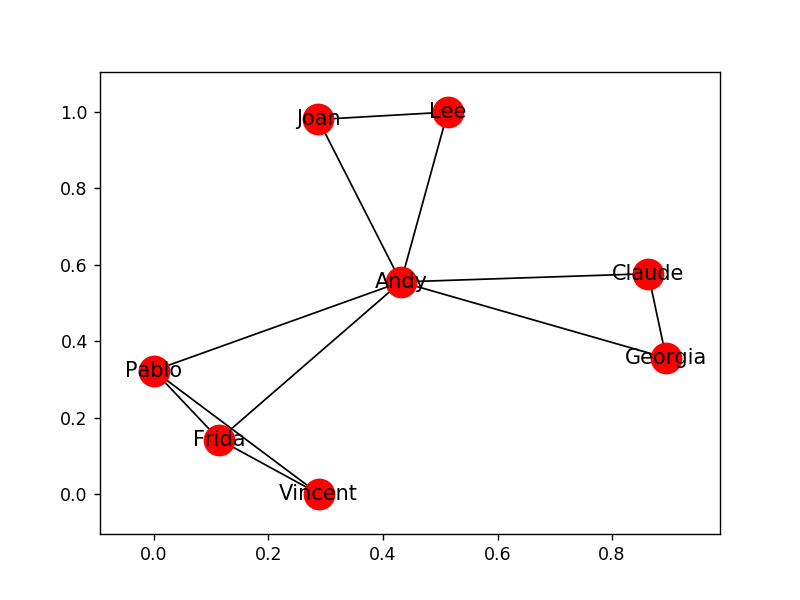

In [9]:
plot_graph(answer_three())

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [10]:
def answer_four():
    
    # Load movies data from previous answer
    movies_df = pd.DataFrame(answer_three().edges(data=True), columns=['Employee_A', 'Employee_B', 'Common_Movies'])
    
    # Map dictionary to integer
    movies_df['Common_Movies'] = movies_df['Common_Movies'].map(lambda x: x['weight'])
    
    # Load relationship data
    rel_df = pd.read_csv('../materials/Employee_Relationships.txt', delimiter = '\t', names = ['Employee_A', 'Employee_B', 'Relationship'])
    
    # Join on each employee pair
    df = rel_df.merge(movies_df, how = 'left', on = ['Employee_A', 'Employee_B'])
    
    # When employees have no movies in common map as 0
    df.fillna(0, inplace = True)
    
    # Return Pearson correlation 
    return df.corr().loc['Relationship', 'Common_Movies']
    #return 0.788396 (return the hard-coded value without any code is demanded by the grader)

In [11]:
answer_four()

0.78839622217334759